In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [55]:
dat = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
dat.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Нужно закодировать каждое значение циферкой.

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label = LabelEncoder()
dicts = {}
for i in dat:
    label.fit(dat[i].drop_duplicates()) #задаю список значений для кодирования
    dicts[i] = list(label.classes_)
    dat[i] = label.transform(dat[i]) #заменяю значения циферками


In [58]:
dat

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Вот те на, получилось!

In [92]:
target=dat['class'].values # предсказываемые значения
train=dat.drop(['class'], axis=1) # фичи

разобью выборки на тренировочные и тестовые

In [75]:
from sklearn.model_selection import train_test_split
tr_train, tr_test, ta_train, ta_test = train_test_split(train, target, test_size=0.5)

In [162]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

Надо бы отобрать самые значимые фичи. Посмотрю на сколько значима каждая из них.
Импортирую случайный лес, делаю классификатор, проверяю зачимость, строю график.

[(0.004723798039101212, 'cap-shape'), (0.013292534456433655, 'cap-surface'), (0.014658367751696278, 'cap-color'), (0.05116894044997022, 'bruises'), (0.18879024554351032, 'odor'), (0.0017197538263225007, 'gill-attachment'), (0.0395180420593023, 'gill-spacing'), (0.10552032499007784, 'gill-size'), (0.12533346435265982, 'gill-color'), (0.02095639670252255, 'stalk-shape'), (0.05678729082579685, 'stalk-root'), (0.039402548413487594, 'stalk-surface-above-ring'), (0.043076781673176835, 'stalk-surface-below-ring'), (0.015809072099215227, 'stalk-color-above-ring'), (0.01428913871078046, 'stalk-color-below-ring'), (0.0, 'veil-type'), (0.001487484993602584, 'veil-color'), (0.010873598862985312, 'ring-number'), (0.09021093244748533, 'ring-type'), (0.06760709410423145, 'spore-print-color'), (0.06136041190599446, 'population'), (0.03341377779164703, 'habitat')]


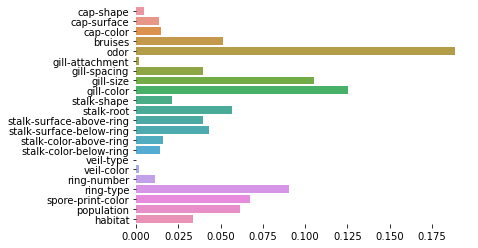

In [62]:
model_rfc = RandomForestClassifier(n_estimators = 70)
model_rfc.fit(tr_train.values, ta_train)
my_features = tr_train.columns
importance = model_rfc.feature_importances_
print([(importance[i],my_features[i]) for i in range(len(my_features))])
sns.set_palette("Set3") #чисто чтобы не так грустно было

ax = sns.barplot(x=importance, y=my_features)
sns.despine(left=True, bottom=True)


Как мы видимим, некотрые из фич имеют очень низкое значение, надо бы подрезать выборку...

In [63]:
from sklearn.feature_selection import RFE

оставлю только 8 самых значимых фич

In [66]:
rfe = RFE(model_rfc, 8) 
selector = rfe.fit(tr_train.values,ta_train)
tr_train=tr_train[tr_train.columns[selector.support_]]
tr_test=tr_test[tr_test.columns[selector.support_]]

In [67]:
tr_train

,odor,gill-size,gill-color,stalk-root,stalk-surface-above-ring,ring-type,spore-print-color,population
1352,5,0,3,3,0,0,3,3
2940,5,0,5,1,2,4,3,4
2045,0,0,7,4,2,4,3,3
4335,2,0,2,1,1,2,1,5
5853,5,0,10,1,2,4,5,4
...,...,...,...,...,...,...,...,...
5050,2,0,7,1,1,2,1,4
390,0,0,5,2,2,4,3,3
7842,5,0,10,0,1,4,7,3
4005,2,0,3,1,1,2,1,5


невероятно, сработало

обучу классификатор на отобранных фичах и учу его. делаю предсказание

In [76]:
model_rfc = RandomForestClassifier(n_estimators = 70)
model_rfc.fit(tr_train.values, ta_train)
pred=model_rfc.predict(tr_test.values)

посмотрю, на сколько хорошо получилось

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [70]:
print(confusion_matrix(ta_test,pred))
print(classification_report(ta_test,pred))
print(accuracy_score(ta_test, pred))

[[1042    0]
 [   0  989]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       989

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

1.0


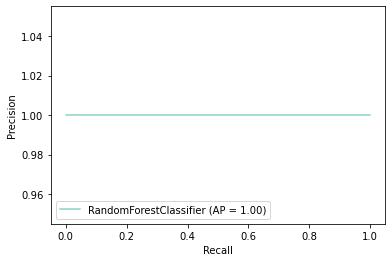

In [71]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(model_rfc, tr_test, ta_test)

Шикарно, просто супер, как мы видим, данные так себе... Я пробовал предсказывать место, например, и  там показатели были человеческими, так что вот так... Не могу объяснить это ошибкой в анализе, потому что ошибок, вроде нет.

# не машинка 

In [107]:
dat = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
dat.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
пишу функцию сортировки

In [158]:
def sort(dat,col,max):
    '''эта функция принимает табличку и столбец, возвращает 
    словарь значений столбца, отсортированный по частосте встречаемости значений, есть еще и переключатель max, когда он True - возвращает самое частое в столбце'''
    hab=list(dat[col])
    dict={hab.count(i):i for i in hab}
    sort_k=list(dict.keys())
    sort_k.sort()
    if max:
        return [dict[sort_k[-1]],sort_k[-1]]
    result={i:dict[i] for i in sort_k}
    return result

## Где чаще всего растут несъедобные грибы? 

In [ ]:
Посмотрим, где же водятся несъедобные грибы...

строю график

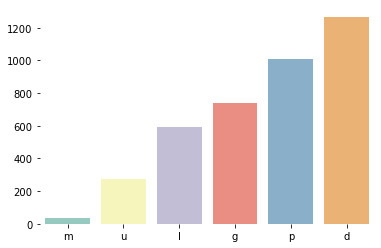

In [154]:
p_dat=dat.loc[dat['class']=='p']
result= sort(p_dat,'habitat',False)


ax = sns.barplot(x=list(result.values()), y=list(result.keys()))
sns.despine(left=True, bottom=True)

Вот это да, оказывается, ядовитые грибы чаще всего живут в лесу. Буду знать.

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Какие наиболее распространенные признаки несъедобных грибов?

Нарисую самые частые значения для каждой из характеристик съедобных грибов

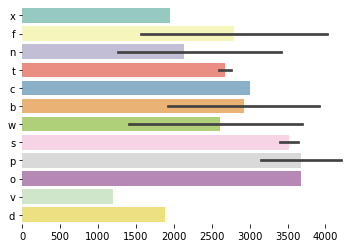

In [161]:
e_dat=dat.loc[dat['class']=='e']
e_dat=e_dat.drop(['class'], axis=1)
res=[]
for col in e_dat.columns:
    res.append(sort(e_dat,col,True))
ax = sns.barplot(x=[i[1] for i in res], y=[i[0] for i in res])
sns.despine(left=True, bottom=True)


ничего себе, вау!
расшифровка :

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d